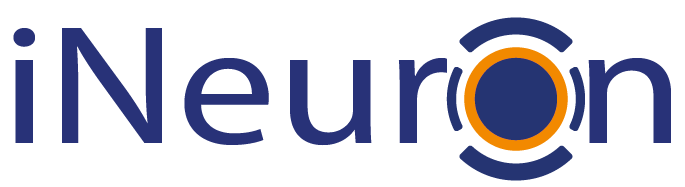

# Algerian Forest Data [Temperature Prediction]

### Life cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory Data Analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose Best Model

## 1) Problem Staement
- I have to predict the Temperature based on the input features.

## 2) Data Collection
- The Dataset is collected from the website itself https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++
- The data consists of -- column and -- rows.

## My approach to Complete this Task

    1. Importing Required Libreries
    2. Loading the Dataset
    3. Exploring the Data
    4. Data Cleaning 
    5. Exploratory Data Analysis
    6. Data Preprocessing
    7. Model Training
    8. Choose Best Model

# 1. Importing Required Libreries

In [231]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("All Libraries Imported Succesfully")

All Libraries Imported Succesfully


# 2. Loading the Dataset

In [49]:
path = r'D:\Data Science Course\iNeuron\Live Classes\Live Material\Algirian Forest Dataset\Algerian_forest_fires_dataset_UPDATE.csv'
data = pd.read_csv(path, header=1)

# 3. Exploring the Data

##### Show Top 5 Records

In [50]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


##### Shape of the Dataset

In [51]:
data.shape

(246, 14)

##### Summary of the Dataset
Statistics for the Numerical columns of Dataset

In [52]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


##### Checking Null Values and Datatypes

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# 4. Data Cleaning

## Merging and converting Datatypes of the Dataset
- All the column have the same data types. So I have to change them.
- In this dataset, there are some rows with name of column again and mixed values we will look forword to them.

###### I have extracted those rows only which comes from Bejaia Region in Bejaia_df

In [54]:
Bejaia_df = data[:122][:]
Bejaia_df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire


##### I have extracted those rows only which have Sidi Bel-abbes Region.

In [55]:
Sidi_df = data[124:][:]
Sidi_df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


##### Now I am merging both of the dataset togather. To get a new and fresh dataset.

In [56]:
Merge_df = [Bejaia_df, Sidi_df]
df = pd.concat(Merge_df)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


### Stripping the Name of Columns

In [57]:
df.columns=[i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

### Stripping the Values of Column Classes

In [71]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

### Adding a New feature

In [72]:
df.loc[:122, 'Region'] = 'Bejaia'
df.loc[122:, 'Region'] = 'Sidi-Bel Abbes'

#### Resetting the Index of Dataset

In [73]:
df.reset_index(inplace=True, drop=True)

In [74]:
df[118:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,Bejaia
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,Bejaia
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,Bejaia
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,Bejaia
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi-Bel Abbes
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi-Bel Abbes
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi-Bel Abbes


##### These rows had some problem with the values, so I simply replace those unwanted values to som meaning full.

In [75]:
df['DC'] = df['DC'].replace('14.6 9', 14.6)
df['FWI'] = df['FWI'].replace("fire   ", 0)

### Changing the Datatype of Columns, according to those values

In [76]:
df['Temperature'] = pd.to_numeric(df['Temperature'])
df['RH'] = pd.to_numeric(df['RH'])
df['Ws'] = pd.to_numeric(df['Ws'])
df['Rain'] = pd.to_numeric(df['Rain'])
df['FFMC'] = pd.to_numeric(df['FFMC'])
df['DMC'] = pd.to_numeric(df['DMC'])
df['DC'] = pd.to_numeric(df['DC'])
df['ISI'] = pd.to_numeric(df['ISI'])
df['BUI'] = pd.to_numeric(df['BUI'])
df['FWI'] = pd.to_numeric(df['FWI'])

### Converting Day, Months and Year to DateTime formate

In [79]:
df['Date'] = pd.to_datetime(df[['day', 'month', 'year']])
df.drop(['day', 'month', 'year'],axis=1, inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int64         
 1   RH           244 non-null    int64         
 2   Ws           244 non-null    int64         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      243 non-null    object        
 11  Region       244 non-null    object        
 12  Date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 24.9+ KB


##### Now we have meaningfull data types regarding with the columns

## Checking Null Values

In [82]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
Date           0
dtype: int64

**Filling the null value from the Mode of Classes Column**

In [84]:
df['Classes'] = df['Classes'].fillna(df['Classes'].mode()[0])

In [85]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
Date           0
dtype: int64

##### Now we don't have any null value in this dataset

### Checking the Numerical and Categorical columns and Feature Information

In [86]:
numericalFeatures = [feature for feature in df.columns if df[feature].dtype != 'O']
categoricalFeatures = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"We have {len(numericalFeatures)} Numerical Features : {numericalFeatures}")
print(f"We have {len(categoricalFeatures)} Categorical Features : {categoricalFeatures}")

We have 11 Numerical Features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Date']
We have 2 Categorical Features : ['Classes', 'Region']


#### Feature Information
- **temperature:** Temperature noon (temperature max) in Celsius degrees: 22 to 42
- **RH:** Relative Humidity in %: 21 to 90
- **Ws:** Ws: Wind speed in km/h: 6 to 29
- **Rain:** Rain: total day in mm: 0 to 16.8
- **FFMC:** Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
- **DMC:** Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
- **DC:** Drought Code (DC) index from the FWI system: 7 to 220.4
- **ISI:** Initial Spread Index (ISI) index from the FWI system: 0to 18.5
- **BUI:** Buildup Index (BUI) index from the FWI system: 1.1 to 68
- **FWI:** Fire Weather Index (FWI) Index: 0 to 31.1
- **Classes:** Two classes, namely Fire and Not Fire
- **Region:** There are two rgions in this dataset, Bejaia and Sidi-Bel Abbes
- **Date:** This is the column for Date

# 4. Exploratory Data Analysis

### Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix 'uni' means 'one'. the purpose of univariate analysis is to understand the distribution of values for a single variable.

In [88]:
for col in categoricalFeatures:
    print(df[col].value_counts(normalize=True) * 100)
    print("\n*****************************************")

fire        56.557377
not fire    43.442623
Name: Classes, dtype: float64

*****************************************
Bejaia            50.0
Sidi-Bel Abbes    50.0
Name: Region, dtype: float64

*****************************************


## Univariate Analysis
The term univariate analysis refers to the analysis of one variable prefix **"uni" means "one"**. The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

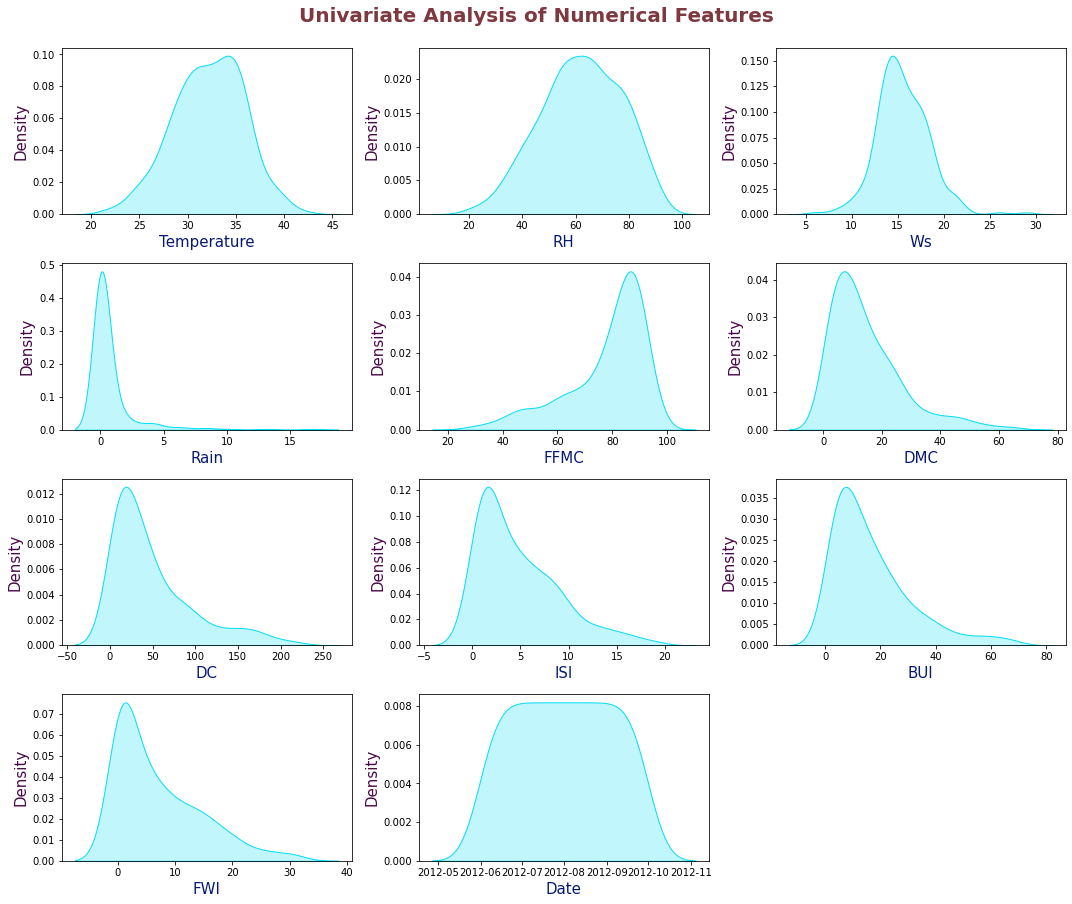

In [89]:
plt.figure(figsize = (15, 15))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight='bold', color='#5e0711', alpha=0.8, y=1.)

for i in range(0, len(numericalFeatures)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df[numericalFeatures[i]], shade=True, color='#05ddf5', multiple='layer')
    plt.xlabel(numericalFeatures[i], fontsize=15, color='#071a70')
    plt.ylabel("Density",fontsize=15, color='#4a0948')
    plt.tight_layout()

##### Report
- **Rain, DMC, DC, ISI, BUI and FWI** are right skewed and positively skewed.
- **FFMC** is left skewed and positively skewed.

## Categorical Features

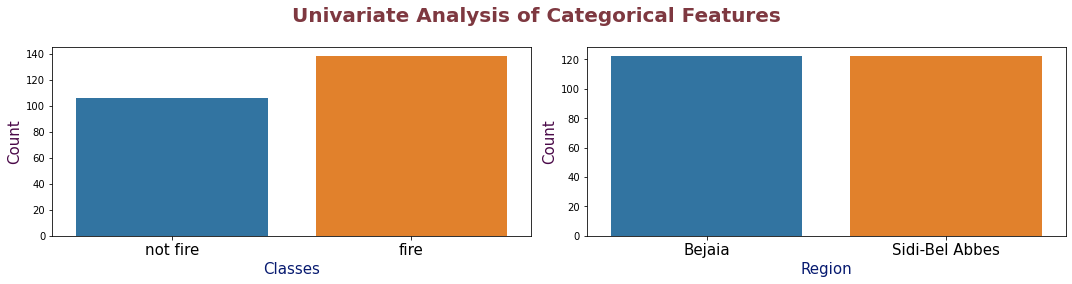

In [94]:
plt.figure(figsize=(15, 10))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight='bold', color='#5e0711', alpha=0.8, y=1.)
for i in range(0, len(categoricalFeatures)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[categoricalFeatures[i]])
    plt.xlabel(categoricalFeatures[i], fontsize=15, color='#071a70')
    plt.ylabel("Count",fontsize=15, color='#4a0948')
    plt.xticks(fontsize=15)
    plt.tight_layout()

## Multivariate Analysis
- Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical Features

In [95]:
df[(df.columns)].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.558393
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.569997
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.028799
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.322682
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.686033
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.874778
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.740189
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.907461
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857771
FWI,0.558393,-0.569997,0.028799,-0.322682,0.686033,0.874778,0.740189,0.907461,0.857771,1.000000


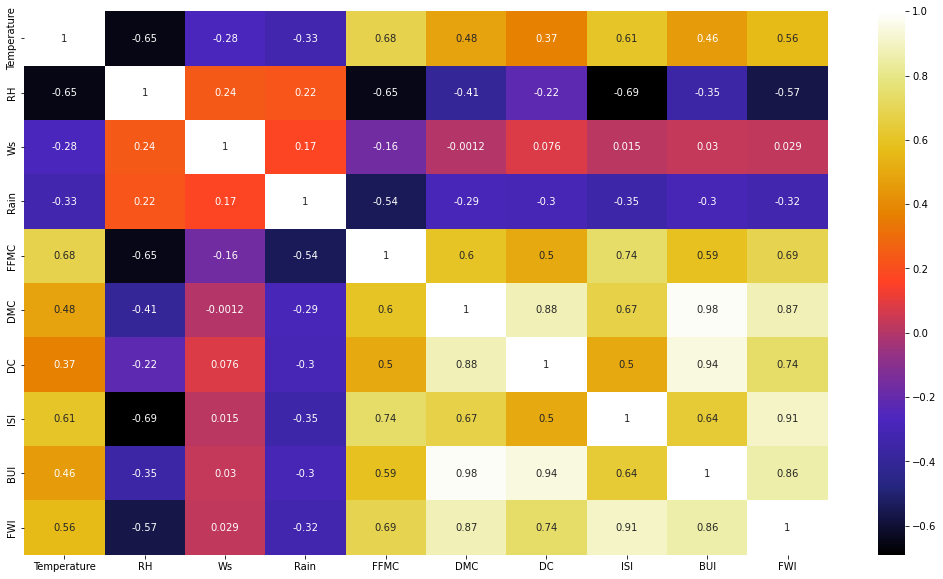

In [96]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

### Check Multicollinearity for Categorical features
- A chi-squared test (also chi-square or x2 test) is a statistical hypothesis thest that is valid to perform when the test statistics is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test.
- A chi- square statistic is one way to show a relationship between two categorical variables.
- Here we test correlation of Categorical columns with Target column i.e. Temperature.

In [97]:
chi2_test = []
for feature in categoricalFeatures:
    if chi2_contingency(pd.crosstab(df['Temperature'], df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")
result = pd.DataFrame(data=[categoricalFeatures, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Classes,Reject Null Hypothesis
1,Region,Reject Null Hypothesis


### Plotting of Continues Features 

In [98]:
continue_features = [feature for feature in numericalFeatures if len(df[feature].unique()) >= 10]
print(f"Number of Continuous Features : {continue_features}")

Number of Continuous Features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Date']


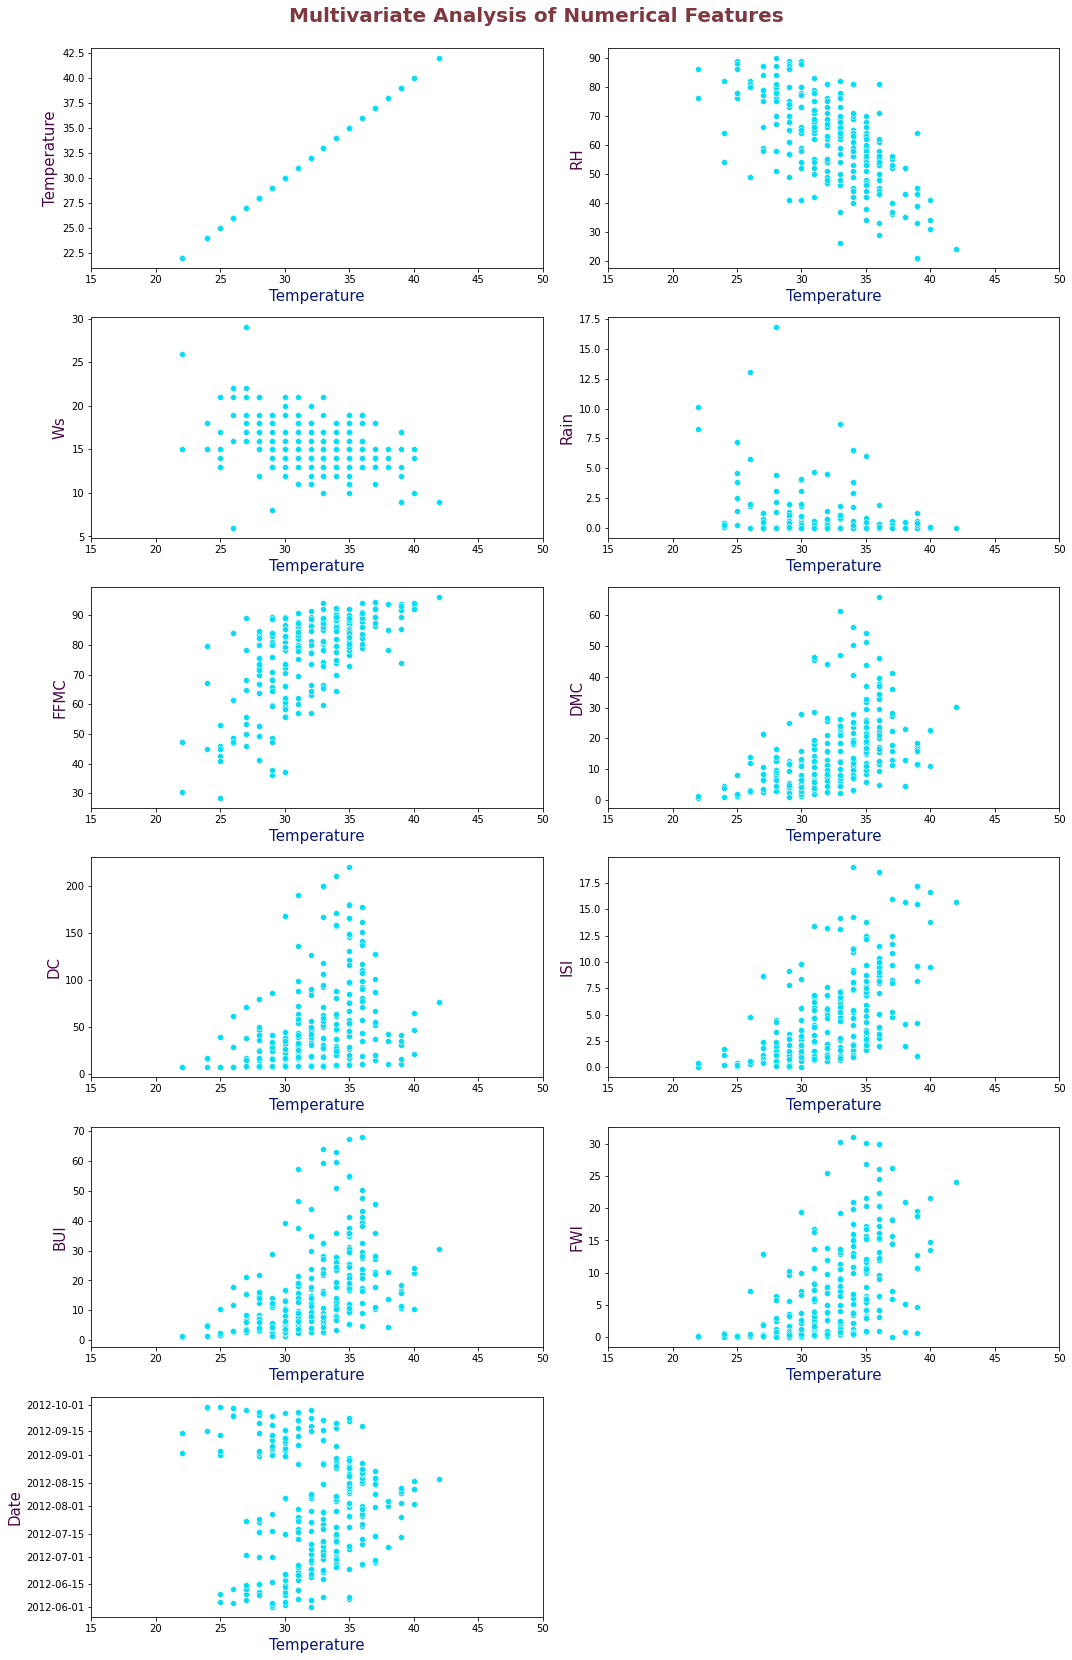

In [99]:
fig = plt.figure(figsize=(15, 30))
plt.suptitle("Multivariate Analysis of Numerical Features", fontsize=20, fontweight='bold', color='#5e0711', alpha=0.8, y=1.)
for i in range(0, len(continue_features)):
    ax = plt.subplot(8, 2, i+1)
    sns.scatterplot(data=df, x='Temperature', y=continue_features[i], color='#05ddf5')
    plt.xlim(15, 50)
    plt.xlabel("Temperature", fontsize=15, color='#071a70')
    plt.ylabel(continue_features[i], fontsize=15, color='#4a0948')
    plt.tight_layout()

#### Analysis Report
##### Report
- **FWI, BUI, ISI, DC and DMC are positively correlated with the Temperature.**
- **RS and Ws slightly negatively correlated with the Temperature.**


## Visualization

### Visualize the Target Column

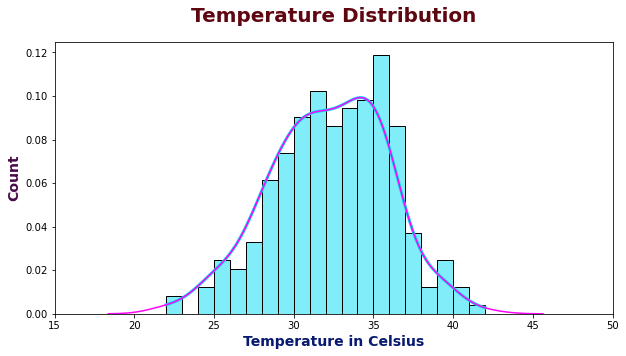

In [100]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(df.Temperature, bins=20, kde=True, color='#05ddf5',stat='density', line_kws={'lw': 3, 'color':'Red'})
sns.kdeplot(data=df, x="Temperature", color='#fc05f8', ax=ax)
plt.title("Temperature Distribution", fontsize=20, weight='bold', pad=20, color='#5e0711')
plt.xlabel("Temperature in Celsius", weight='bold', fontsize=14, color='#071a70')
plt.ylabel('Count', weight='bold', fontsize=14, color='#4a0948')
plt.xlim(15, 50)
plt.show()

**We can see that the target variable is not skewed and range between 20 to 45**

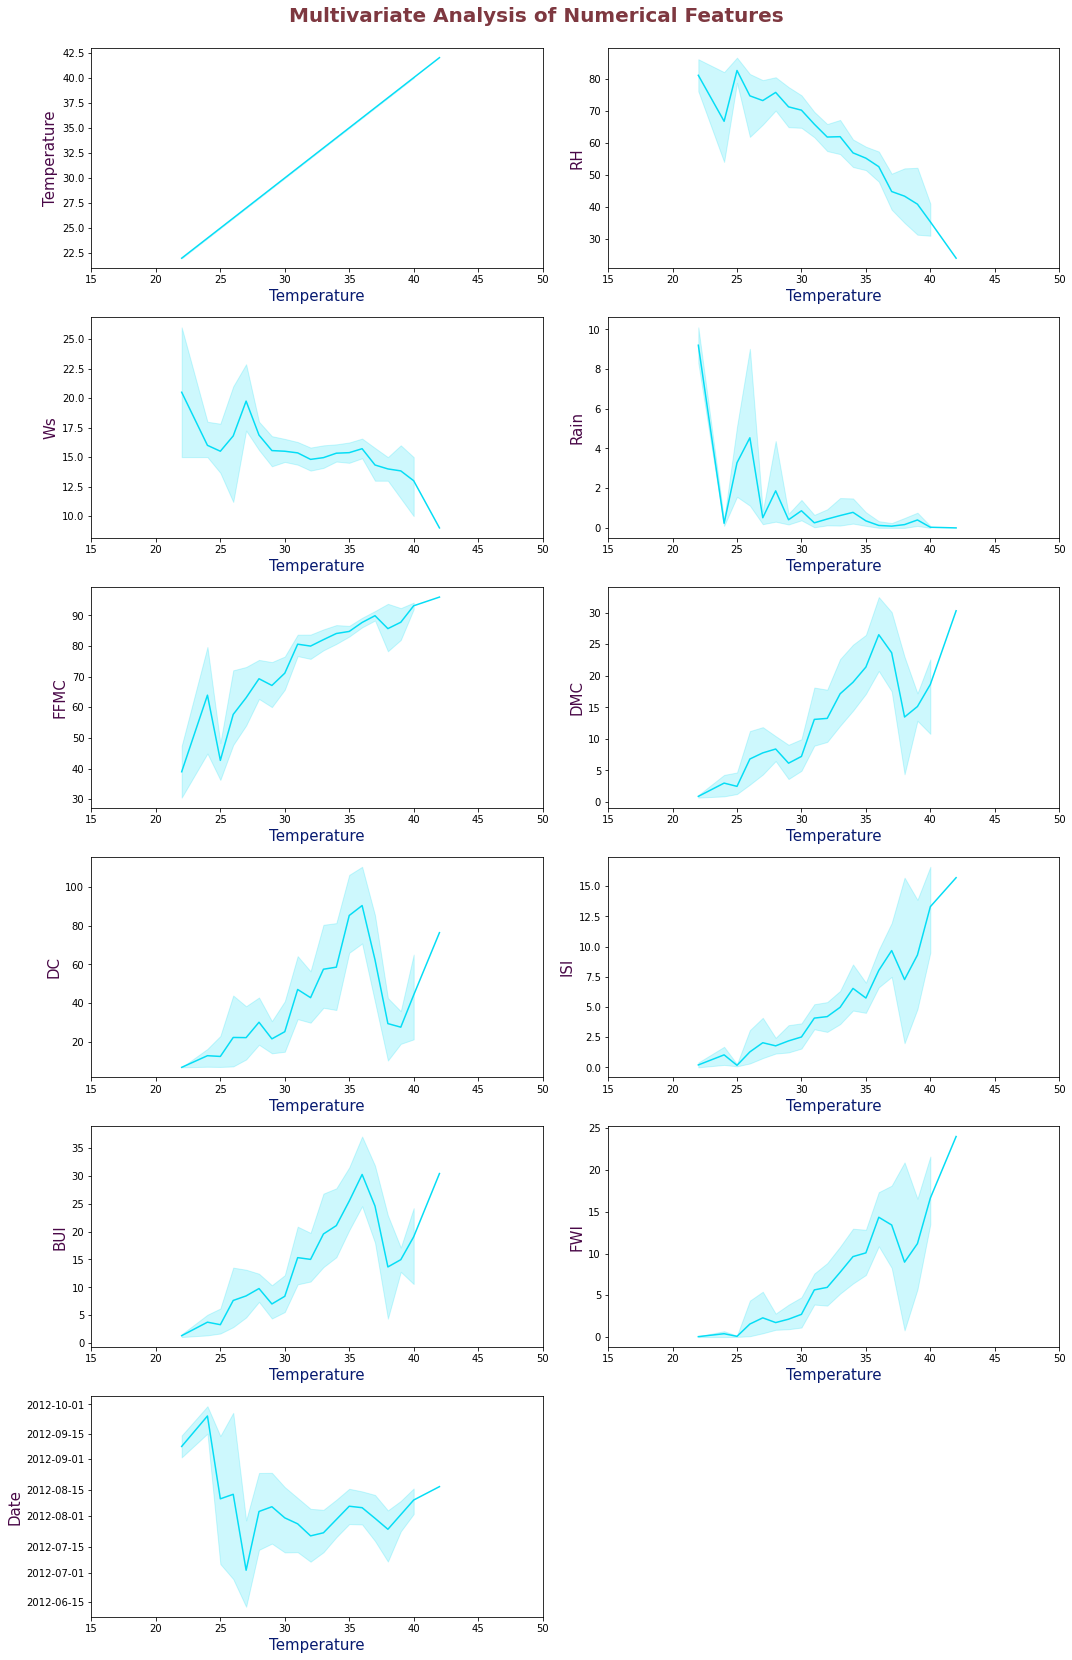

In [101]:
fig = plt.figure(figsize=(15, 30))
plt.suptitle("Multivariate Analysis of Numerical Features", fontsize=20, fontweight='bold', color='#5e0711', alpha=0.8, y=1.)
for i in range(0, len(continue_features)):
    ax = plt.subplot(8, 2, i+1)
    sns.lineplot(data=df, x='Temperature', y=continue_features[i], color='#05ddf5')
    plt.xlim(15, 50)
    plt.xlabel("Temperature", fontsize=15, color='#071a70')
    plt.ylabel(continue_features[i], fontsize=15, color='#4a0948')
    plt.tight_layout()

- **When the Temperature increases, Relative Humidity highly decreases.**
- **When the Temperature increases, Wind Speed also decreases.**
- **When the Temperature increases, Rain decreases.**

### Relative Humidity and Wind Speed with Temperature

<AxesSubplot:xlabel='RH', ylabel='Ws'>

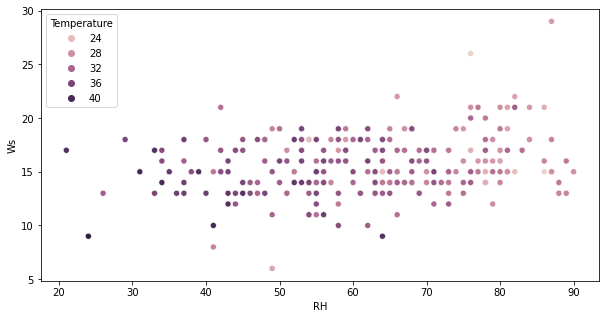

In [112]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="RH", y="Ws", hue="Temperature")

### Temperature Vs Initial Speed Index

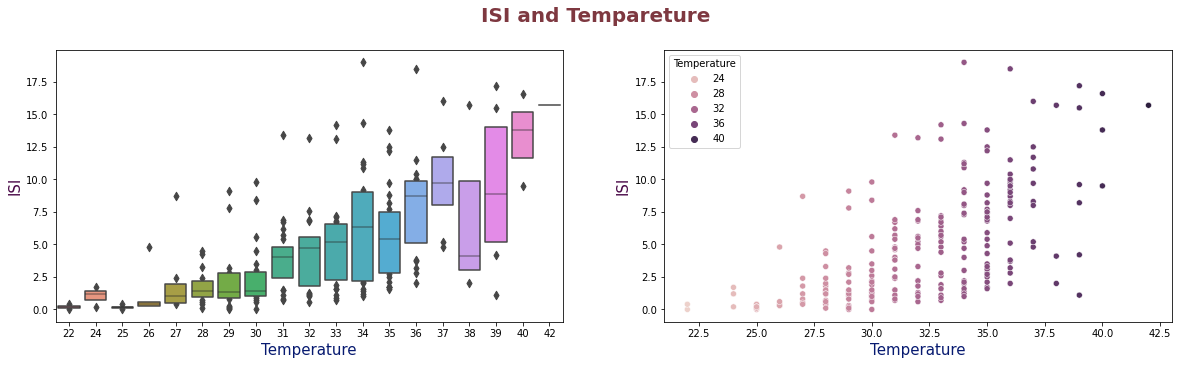

In [149]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2,1)
sns.boxenplot(data=df, x="Temperature", y="ISI")
plt.xlabel("Temperature", fontsize=15, color='#071a70')
plt.ylabel("ISI", fontsize=15, color='#4a0948')
plt.subplot(1, 2,2)
sns.scatterplot(data=df, x="Temperature", y="ISI", hue="Temperature")
plt.suptitle("ISI and Tempareture", fontsize=20, fontweight='bold', color='#5e0711', alpha=0.8, y=1.)
plt.xlabel("Temperature", fontsize=15, color='#071a70')
plt.ylabel("ISI", fontsize=15, color='#4a0948')
plt.show()

**Where Wind Speed and Relative Humidity both are less, there Temperature is More**

### Rain and Tempareture

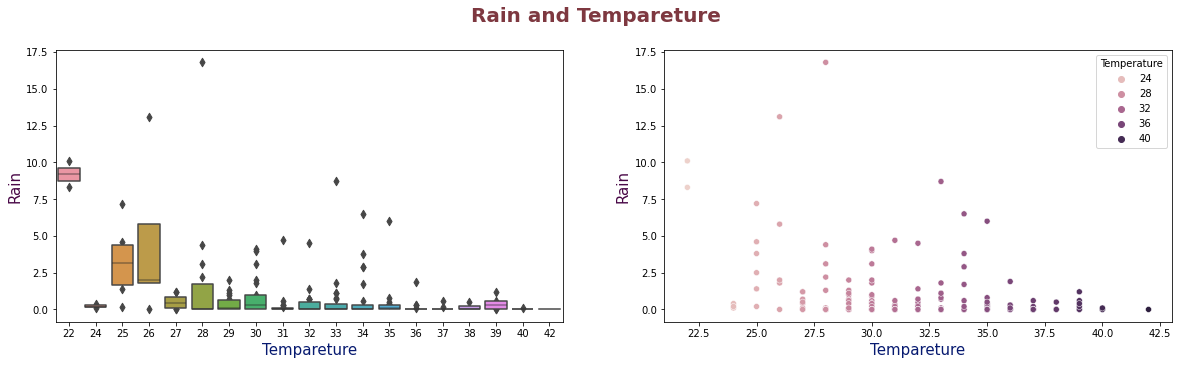

In [144]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2,1)
sns.boxenplot(data=df, x="Temperature", y="Rain")
plt.xlabel("Tempareture", fontsize=15, color='#071a70')
plt.ylabel("Rain", fontsize=15, color='#4a0948')
plt.subplot(1, 2,2)
sns.scatterplot(data=df, x="Temperature", y="Rain", hue="Temperature")
plt.suptitle("Rain and Tempareture", fontsize=20, fontweight='bold', color='#5e0711', alpha=0.8, y=1.)
plt.xlabel("Tempareture", fontsize=15, color='#071a70')
plt.ylabel("Rain", fontsize=15, color='#4a0948')
plt.show()

**Graph is showing where the quantity of Rain is Less then 2.5, Temperature increases**

### Fine Fuel Moisture Code and Temperature

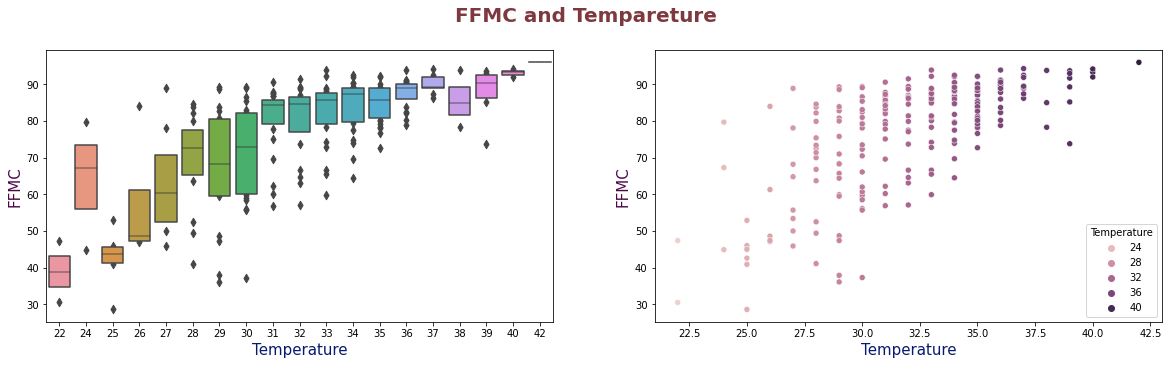

In [146]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2,1)
sns.boxenplot(data=df, x="Temperature", y="FFMC")
plt.xlabel("Temperature", fontsize=15, color='#071a70')
plt.ylabel("FFMC", fontsize=15, color='#4a0948')
plt.subplot(1, 2,2)
sns.scatterplot(data=df, x="Temperature", y="FFMC", hue="Temperature")
plt.suptitle("FFMC and Tempareture", fontsize=20, fontweight='bold', color='#5e0711', alpha=0.8, y=1.)
plt.xlabel("Temperature", fontsize=15, color='#071a70')
plt.ylabel("FFMC", fontsize=15, color='#4a0948')
plt.show()

**When FFMC increses Temperature is also Increses**

### Buildup Index and Temperature

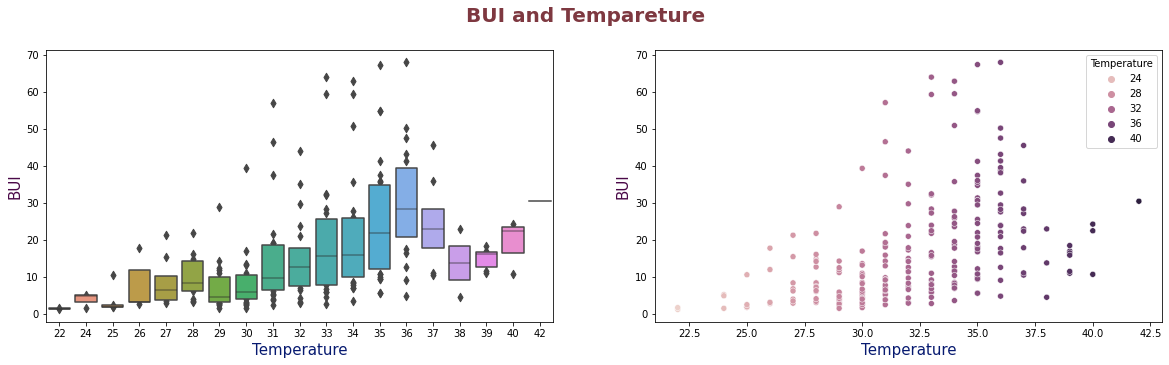

In [147]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2,1)
sns.boxenplot(data=df, x="Temperature", y="BUI")
plt.xlabel("Temperature", fontsize=15, color='#071a70')
plt.ylabel("BUI", fontsize=15, color='#4a0948')
plt.subplot(1, 2,2)
sns.scatterplot(data=df, x="Temperature", y="BUI", hue="Temperature")
plt.suptitle("BUI and Tempareture", fontsize=20, fontweight='bold', color='#5e0711', alpha=0.8, y=1.)
plt.xlabel("Temperature", fontsize=15, color='#071a70')
plt.ylabel("BUI", fontsize=15, color='#4a0948')
plt.show()

### Duff Moisture Code and Temperature

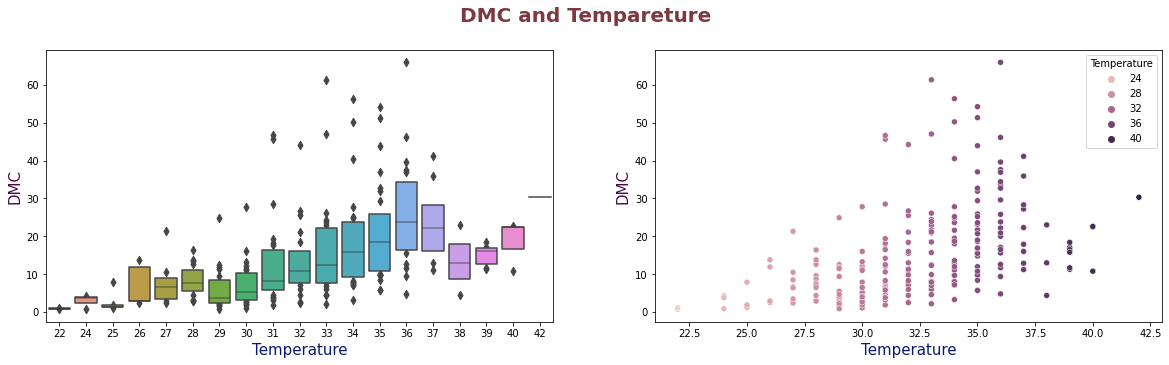

In [148]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2,1)
sns.boxenplot(data=df, x="Temperature", y="DMC")
plt.xlabel("Temperature", fontsize=15, color='#071a70')
plt.ylabel("DMC", fontsize=15, color='#4a0948')
plt.subplot(1, 2,2)
sns.scatterplot(data=df, x="Temperature", y="DMC", hue="Temperature")
plt.suptitle("DMC and Tempareture", fontsize=20, fontweight='bold', color='#5e0711', alpha=0.8, y=1.)
plt.xlabel("Temperature", fontsize=15, color='#071a70')
plt.ylabel("DMC", fontsize=15, color='#4a0948')
plt.show()

# 6. Data Preprocessing

In [161]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'Date'],
      dtype='object')

### Independent Features

In [162]:
X = pd.DataFrame(df, columns=['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'])

In [163]:
X

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...
239,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,Sidi-Bel Abbes
241,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


### Dependent Features

In [164]:
y = pd.DataFrame(df, columns=['Temperature'])

In [165]:
y

,Temperature
0,29
1,29
2,26
3,25
4,27
...,...
239,30
240,28
241,27
242,24


### Changing Categorical Column to Numerical (Classes and Region)

In [166]:
X['Classes'] = df['Classes'].replace(['not fire', 'fire'], [0, 1])
X['Region'] = df['Region'].replace(['Bejaia', 'Sidi-Bel Abbes'], [1, 0])

# Model Training

## Train Test Split

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=42, shuffle=True)

In [177]:
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of X_train : (168, 11)
Shape of X_test : (76, 11)
Shape of y_train : (168, 1)
Shape of y_test : (76, 1)


## Standardization and Feature Scalling

In [178]:
scaler = StandardScaler()
scaler

StandardScaler()

In [179]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [181]:
X_train

array([[-0.25704846,  0.19523861, -0.38755319, ...,  0.56979502,
         0.94214672, -1.        ],
       [ 0.2921934 , -0.55878638, -0.38755319, ..., -0.58369047,
         0.94214672,  1.        ],
       [-1.01225602, -0.93579887, -0.38755319, ...,  1.17400171,
         0.94214672,  1.        ],
       ...,
       [ 0.9100905 ,  0.57225111,  2.87696172, ..., -0.91325775,
        -1.0614058 ,  1.        ],
       [-0.39435893,  0.19523861, -0.38755319, ...,  0.30888759,
         0.94214672, -1.        ],
       [ 0.97874573,  2.08030109,  0.42857554, ..., -0.88579381,
        -1.0614058 ,  1.        ]])

In [183]:
X_test[0:5]

array([[ 0.0862277 , -0.18177388, -0.38755319,  0.66371781, -0.03113494,
         0.3046916 ,  0.2738116 ,  0.12098151,  0.22649577,  0.94214672,
         1.        ],
       [-0.60032463, -0.93579887, -0.38755319,  0.76701381, -0.37399901,
        -0.37642672,  0.44328657, -0.39181838,  0.06171213,  0.94214672,
         1.        ],
       [-1.01225602,  0.19523861, -0.38755319,  0.72569541, -0.53347066,
        -0.63619256,  0.54012941, -0.60663996, -0.04814363,  0.94214672,
        -1.        ],
       [-0.66897986,  0.57225111, -0.16085077,  0.2161018 ,  0.48714795,
         2.05146351, -0.4525097 ,  0.97333808, -0.11680348,  0.94214672,
        -1.        ],
       [-1.49284265, -2.06683636, -0.34221271,  1.02869702,  0.63864602,
         0.33128181,  1.19381859,  0.52983547,  1.10534186,  0.94214672,
        -1.        ]])

## Linear Regression

In [185]:
LR_model = LinearRegression()
LR_model

LinearRegression()

In [186]:
LR_model.fit(X_train, y_train)

LinearRegression()

##### Coefficient

In [187]:
print(LR_model.coef_)

[[-1.05174431 -0.47022109  0.11751917  1.77349307  1.00521831  0.66155294
   0.15659085 -1.30553598  0.09124636 -0.20640675  0.01328138]]


##### Intercept

In [188]:
print(LR_model.intercept_)

[32.02380952]


### Prediction of Test Data

In [189]:
Lr_pred = LR_model.predict(X_test)
Lr_pred

array([[33.04483369],
       [34.19039635],
       [33.9454099 ],
       [33.109523  ],
       [36.59941132],
       [32.48879378],
       [35.24538358],
       [27.30877754],
       [30.89972895],
       [29.57876485],
       [29.32573764],
       [33.29310072],
       [33.90499721],
       [33.30638807],
       [34.25283745],
       [32.16710006],
       [37.14636806],
       [25.23813058],
       [32.29270431],
       [33.54048785],
       [30.84666299],
       [28.41154445],
       [35.06495744],
       [28.67453185],
       [36.51882083],
       [26.83262776],
       [32.74305439],
       [33.30489716],
       [32.86733578],
       [34.70652631],
       [34.54862765],
       [31.5566461 ],
       [32.68893341],
       [33.3396574 ],
       [32.64862588],
       [33.26216552],
       [30.34261001],
       [34.25002745],
       [31.79191274],
       [23.76317075],
       [33.60377708],
       [33.76534708],
       [32.40679859],
       [24.85641751],
       [36.20074836],
       [32

<AxesSubplot:ylabel='Density'>

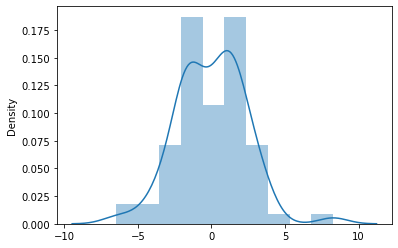

In [190]:
sns.distplot(Lr_pred-y_test)

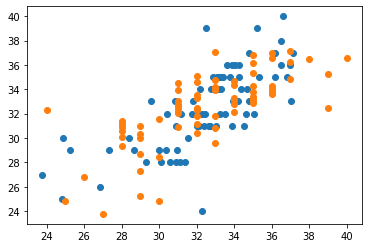

In [202]:
plt.scatter(x = Lr_pred, y=y_test)
plt.scatter(x=y_test, y=Lr_pred)

<AxesSubplot:title={'center':'Feature Importances of 11 Features using LinearRegression'}, xlabel='coefficient value'>

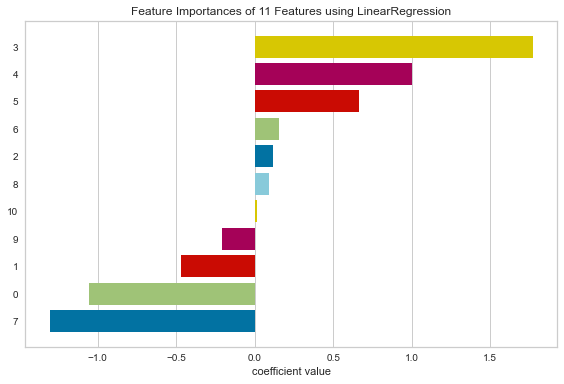

In [206]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(LR_model,relative=False)
#fit on train dataset
viz.fit(X_train, y_train)
#show plot and save at output path
viz.show("feature_importance.jpg")

### Residuals (Difference Between Actual and Predicted Values)

In [207]:
Residual = y_test-Lr_pred
Residual

,Temperature
24,-2.044834
6,-1.190396
153,-0.945410
211,1.890477
198,3.400589
...,...
216,-3.125010
79,1.610308
29,-1.775565
234,-1.176651


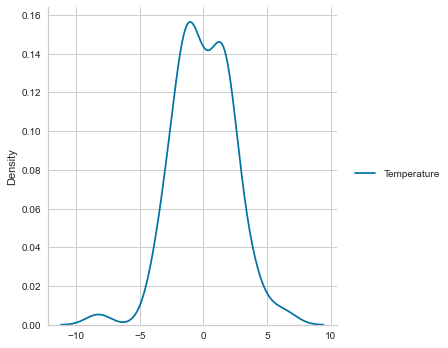

In [214]:
sns.displot(Residual, kind='kde')

### Performance Matrics

In [253]:
print(f"Mean Squared Error : {mean_squared_error(y_test, Lr_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test, Lr_pred)}")
print(f"Numpy Square Root : {mean_squared_error(y_test, Lr_pred)}")
print(f"R2 Score : {r2_score(y_test, Lr_pred)}")

lr_AdjR2 = 1-(1-r2_score(y_test, Lr_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(f"Adjusted R Square : {lr_AdjR2}")

Mean Squared Error : 5.382731108690622
Mean Absolute Error : 1.864874077736848
Numpy Square Root : 5.382731108690622
R2 Score : 0.5100747733407338
Adjusted R Square : 0.42586887500867243


## Lasso Regrassion

In [226]:
Lasso = Lasso()
Lasso.fit(X_train, y_train)

Lasso()

##### Coefficient and Intercepts

In [227]:
print(Lasso.coef_)

[-0.62639886 -0.         -0.          1.24155045  0.          0.
  0.          0.          0.          0.         -0.        ]


##### Intercept

In [228]:
print(Lasso.intercept_)

[32.02380952]


#### Prediction for the Test Data from Lasso

In [229]:
LassoPred = Lasso.predict(X_test)
LassoPred

array([32.79383573, 33.35213853, 33.55887301, 32.71115903, 34.23610371,
       31.69090982, 34.09126987, 28.85681775, 30.99452755, 30.11543575,
       31.07224535, 32.43628254, 32.82205011, 32.33368478, 33.38608129,
       32.47595368, 34.60477165, 27.39249124, 32.29512513, 33.1381367 ,
       31.62747022, 29.80584701, 33.66976408, 30.33046355, 34.6480337 ,
       28.74567018, 32.56273428, 32.86249073, 33.02049127, 33.93583427,
       33.27493371, 31.29060757, 32.80238554, 32.8365848 , 32.59949847,
       32.73834743, 31.43185049, 33.32854104, 31.06728645, 28.31638406,
       32.8132438 , 32.96739693, 32.63498019, 27.495089  , 34.27055945,
       32.5617083 , 31.88319513, 30.90330103, 34.22079954, 33.52390427,
       34.42522557, 31.81633559, 31.7886342 , 32.98193162, 33.48064222,
       32.11480957, 34.91461688, 32.6254044 , 31.08541205, 34.4604508 ,
       33.16301666, 31.17766454, 33.3259761 , 32.23604592, 32.1450759 ,
       27.93189896, 33.06871222, 31.68577995, 34.3736702 , 34.14

#### Performance Matrics

In [254]:
print(f"Mean Squared Error : {mean_squared_error(y_test, LassoPred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test, LassoPred)}")
print(f"Numpy Square Root : {mean_squared_error(y_test, LassoPred)}")
print(f"R2 Score : {r2_score(y_test, LassoPred)}")

lasso_AdjR2 = 1-(1-r2_score(y_test, LassoPred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(f"Adjusted R Square : {lasso_AdjR2}")

Mean Squared Error : 6.21723670671486
Mean Absolute Error : 2.0048361434696726
Numpy Square Root : 6.21723670671486
R2 Score : 0.43411977280200076
Adjusted R Square : 0.3368591087523446


## Ridge

In [241]:
Ridge = Lasso()
Ridge.fit(X_train, y_train)

Lasso()

##### Coefficient

In [243]:
print(Ridge.coef_)

[-0.62639886 -0.         -0.          1.24155045  0.          0.
  0.          0.          0.          0.         -0.        ]


##### Intercept

In [244]:
print(Ridge.intercept_)

[32.02380952]


#### Prediction

In [246]:
RidgePred = Ridge.predict(X_test)
RidgePred

array([32.79383573, 33.35213853, 33.55887301, 32.71115903, 34.23610371,
       31.69090982, 34.09126987, 28.85681775, 30.99452755, 30.11543575,
       31.07224535, 32.43628254, 32.82205011, 32.33368478, 33.38608129,
       32.47595368, 34.60477165, 27.39249124, 32.29512513, 33.1381367 ,
       31.62747022, 29.80584701, 33.66976408, 30.33046355, 34.6480337 ,
       28.74567018, 32.56273428, 32.86249073, 33.02049127, 33.93583427,
       33.27493371, 31.29060757, 32.80238554, 32.8365848 , 32.59949847,
       32.73834743, 31.43185049, 33.32854104, 31.06728645, 28.31638406,
       32.8132438 , 32.96739693, 32.63498019, 27.495089  , 34.27055945,
       32.5617083 , 31.88319513, 30.90330103, 34.22079954, 33.52390427,
       34.42522557, 31.81633559, 31.7886342 , 32.98193162, 33.48064222,
       32.11480957, 34.91461688, 32.6254044 , 31.08541205, 34.4604508 ,
       33.16301666, 31.17766454, 33.3259761 , 32.23604592, 32.1450759 ,
       27.93189896, 33.06871222, 31.68577995, 34.3736702 , 34.14

#### Performance Matrics

In [255]:
print(f"Mean Squared Error : {mean_squared_error(y_test, RidgePred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test, RidgePred)}")
print(f"Numpy Square Root : {mean_squared_error(y_test, RidgePred)}")
print(f"R2 Score : {r2_score(y_test, RidgePred)}")

ridge_AdjR2 = 1-(1-r2_score(y_test, RidgePred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(f"Adjusted R Square : {ridge_AdjR2}")

Mean Squared Error : 6.21723670671486
Mean Absolute Error : 2.0048361434696726
Numpy Square Root : 6.21723670671486
R2 Score : 0.43411977280200076
Adjusted R Square : 0.3368591087523446


## ElasticNet Regression

In [232]:
Elastic = ElasticNet()
Elastic

ElasticNet()

In [233]:
Elastic.fit(X_train, y_train)

ElasticNet()

##### Coefficient and Intercept

In [235]:
print(f"Coefficient : {Elastic.coef_}")
print(f"\nIntercept : {Elastic.intercept_}")

Coefficient : [-0.68242406 -0.10105351 -0.0032322   0.83589993  0.10519937  0.
  0.23737559  0.02675224  0.16301969  0.08127814 -0.        ]

Intercept : [32.02380952]


### Prediction of ElasticNet

In [236]:
ElasticPred = Elastic.predict(X_test)
ElasticPred

array([32.71784542, 33.31248585, 33.42732059, 32.63107542, 34.73392745,
       31.56876812, 34.24246634, 29.02722093, 30.71865552, 30.10403569,
       30.40717042, 32.23674684, 32.48026135, 32.0988863 , 33.8812424 ,
       32.28091869, 35.66573062, 27.89584234, 32.14108395, 32.96203631,
       31.01667638, 29.64822111, 33.72610249, 30.10089288, 35.42212254,
       28.88309797, 32.40317803, 32.88532665, 32.72790325, 34.22054716,
       33.35670832, 31.19714095, 32.75234067, 33.08798781, 32.10092102,
       32.38607013, 30.81925383, 33.30835294, 31.04486337, 27.9891745 ,
       32.82439966, 32.83251851, 32.19011991, 27.84462447, 34.7496942 ,
       32.42239136, 31.71383961, 30.73291168, 34.34873655, 33.63272117,
       35.65668257, 31.39303911, 31.58801355, 33.63310244, 33.66102377,
       32.29230766, 36.12934075, 31.99636872, 30.83909239, 34.9328131 ,
       33.1124358 , 30.78581224, 33.5230526 , 31.96074406, 31.71196889,
       28.00384999, 33.0230373 , 31.37346638, 35.41358593, 34.17

In [256]:
print(f"Mean Squared Error : {mean_squared_error(y_test, ElasticPred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test, ElasticPred)}")
print(f"Numpy Square Root : {np.sqrt(mean_squared_error(y_test, ElasticPred))}")
print(f"R2 Score : {r2_score(y_test, ElasticPred)}")

elastic_AdjR2 = 1-(1-r2_score(y_test, ElasticPred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(f"Adjusted R Square : {elastic_AdjR2}")

Mean Squared Error : 5.537321789413174
Mean Absolute Error : 1.863788027528026
Numpy Square Root : 2.353151459089103
R2 Score : 0.4960042443168847
Adjusted R Square : 0.4093799738088493


In [240]:
Matrix = pd.DataFrame(columns = ['Model_Name', 'R2_Score', 'Mean_Squared_Error', 'Mean_Absolute Error', 'Np_Squared_Error'])

In [248]:
Matrix['Model_Name'] = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet']

In [257]:
lr = r2_score(y_test, Lr_pred)
ridge = r2_score(y_test, RidgePred)
lasso = r2_score(y_test, LassoPred)
elastic = r2_score(y_test, ElasticPred)

lr_mse = mean_squared_error(y_test, Lr_pred)
ridge_mse = mean_squared_error(y_test, RidgePred)
lasso_mse = mean_squared_error(y_test, LassoPred)
elastic_mse = mean_squared_error(y_test, ElasticPred)

lr_mae = mean_absolute_error(y_test, Lr_pred)
ridge_mae = mean_absolute_error(y_test, RidgePred)
lasso_mae = mean_absolute_error(y_test, LassoPred)
elastic_mae = mean_absolute_error(y_test, ElasticPred)

lr_smae = np.sqrt(mean_squared_error(y_test, Lr_pred))
ridge_smae = np.sqrt(mean_squared_error(y_test, RidgePred))
lasso_smae = np.sqrt(mean_squared_error(y_test, LassoPred))
elastic_smae = np.sqrt(mean_squared_error(y_test, ElasticPred))

In [258]:
Matrix['R2_Score'] = [lr, ridge, lasso, elastic]
Matrix['Mean_Squared_Error'] = [lr_mse, ridge_mse, lasso_mse, elastic_mse]
Matrix['Mean_Absolute Error'] = [lr_mae, ridge_mae, lasso_mae, elastic_mae]
Matrix['Np_Squared_Error'] = [lr_smae, ridge_smae, lasso_smae, elastic_smae]
Matrix['Adjusted_R_Square'] = [lr_AdjR2, lasso_AdjR2, ridge_AdjR2, elastic_AdjR2]

In [259]:
Matrix

,Model_Name,R2_Score,Mean_Squared_Error,Mean_Absolute Error,Np_Squared_Error,Adjusted_R_Square
0,Linear Regression,0.510075,5.382731,1.864874,2.320071,0.425869
1,Ridge,0.434120,6.217237,2.004836,2.493439,0.336859
2,Lasso,0.434120,6.217237,2.004836,2.493439,0.336859
3,ElasticNet,0.496004,5.537322,1.863788,2.353151,0.409380


# Thankyou